<a href="https://colab.research.google.com/github/pablosoria7/Python/blob/main/Industria_petrolera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install mapclassify

In [2]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px

In [3]:
### FONTS
bse = '/content/drive/My Drive/ttf/'
def Font(d, s=None):
    fpath = os.path.join(mpl.get_data_path(), d)
    return fm.FontProperties(fname=fpath, size=s)
title = Font(d=bse + 'M Ying Hei PRC W48 W7.ttf')
subtitle = Font(d=bse + 'Varta-Regular.ttf')
legend = Font(d=bse + 'News Gothic WGL W01 Regular.ttf', s=16)
ticks = Font(d=bse + 'Sirichana W31.ttf')

# Global

In [4]:
datafile = "/content/drive/My Drive/oil-proved-reserves.csv"
shapefile ='/content/drive/My Drive/asdfasdf/ne_10m_admin_0_countries_lakes.shp'
df = pd.read_csv(datafile)
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']].to_crs('+proj=robin')

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
print(gdf.head(), gdf.info())
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf[gdf['country'] == 'Antarctica'].index)
#Filter data for year 2018.
df_2018 = df[df['Year'] == 2018]

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   country       255 non-null    object  
 1   country_code  255 non-null    object  
 2   geometry      255 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 6.1+ KB
     country country_code                                           geometry
0  Indonesia          IDN  MULTIPOLYGON (((11108970.260 445285.130, 11108...
1   Malaysia          MYS  MULTIPOLYGON (((11108970.260 445285.130, 11108...
2      Chile          CHL  MULTIPOLYGON (((-6477059.899 -1872360.838, -64...
3    Bolivia          BOL  POLYGON ((-6477059.899 -1872360.838, -6477072....
4       Peru          PER  MULTIPOLYGON (((-6477059.899 -1872360.838, -64... None


In [5]:
#Merge dataframes gdf and df_2018
merged = gdf.merge(df_2018, left_on = 'country_code', right_on = 'Code', how = 'left')
merged

,country,country_code,geometry,Entity,Code,Year,Oil proved reserves - BBL
0,Indonesia,IDN,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Indonesia,IDN,2018.0,430246520.0
1,Malaysia,MYS,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Malaysia,MYS,2018.0,372617520.0
2,Chile,CHL,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",NaN,NaN,NaN,NaN
3,Bolivia,BOL,"POLYGON ((-6477059.899 -1872360.838, -6477072....",NaN,NaN,NaN,NaN
4,Peru,PER,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",Peru,PER,2018.0,117152596.0
...,...,...,...,...,...,...,...
249,Macao S.A.R,MAC,"MULTIPOLYGON (((10497985.125 2370383.305, 1049...",NaN,NaN,NaN,NaN
250,Ashmore and Cartier Islands,ATC,"POLYGON ((11596524.348 -1329232.492, 11596465....",NaN,NaN,NaN,NaN
251,Bajo Nuevo Bank (Petrel Is.),BJN,"POLYGON ((-7473161.812 1689299.322, -7473011.2...",NaN,NaN,NaN,NaN
252,Serranilla Bank,SER,"POLYGON ((-7346107.787 1696479.863, -7346398.9...",NaN,NaN,NaN,NaN


<ipython-input-6-3c9fdae5ab5f>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


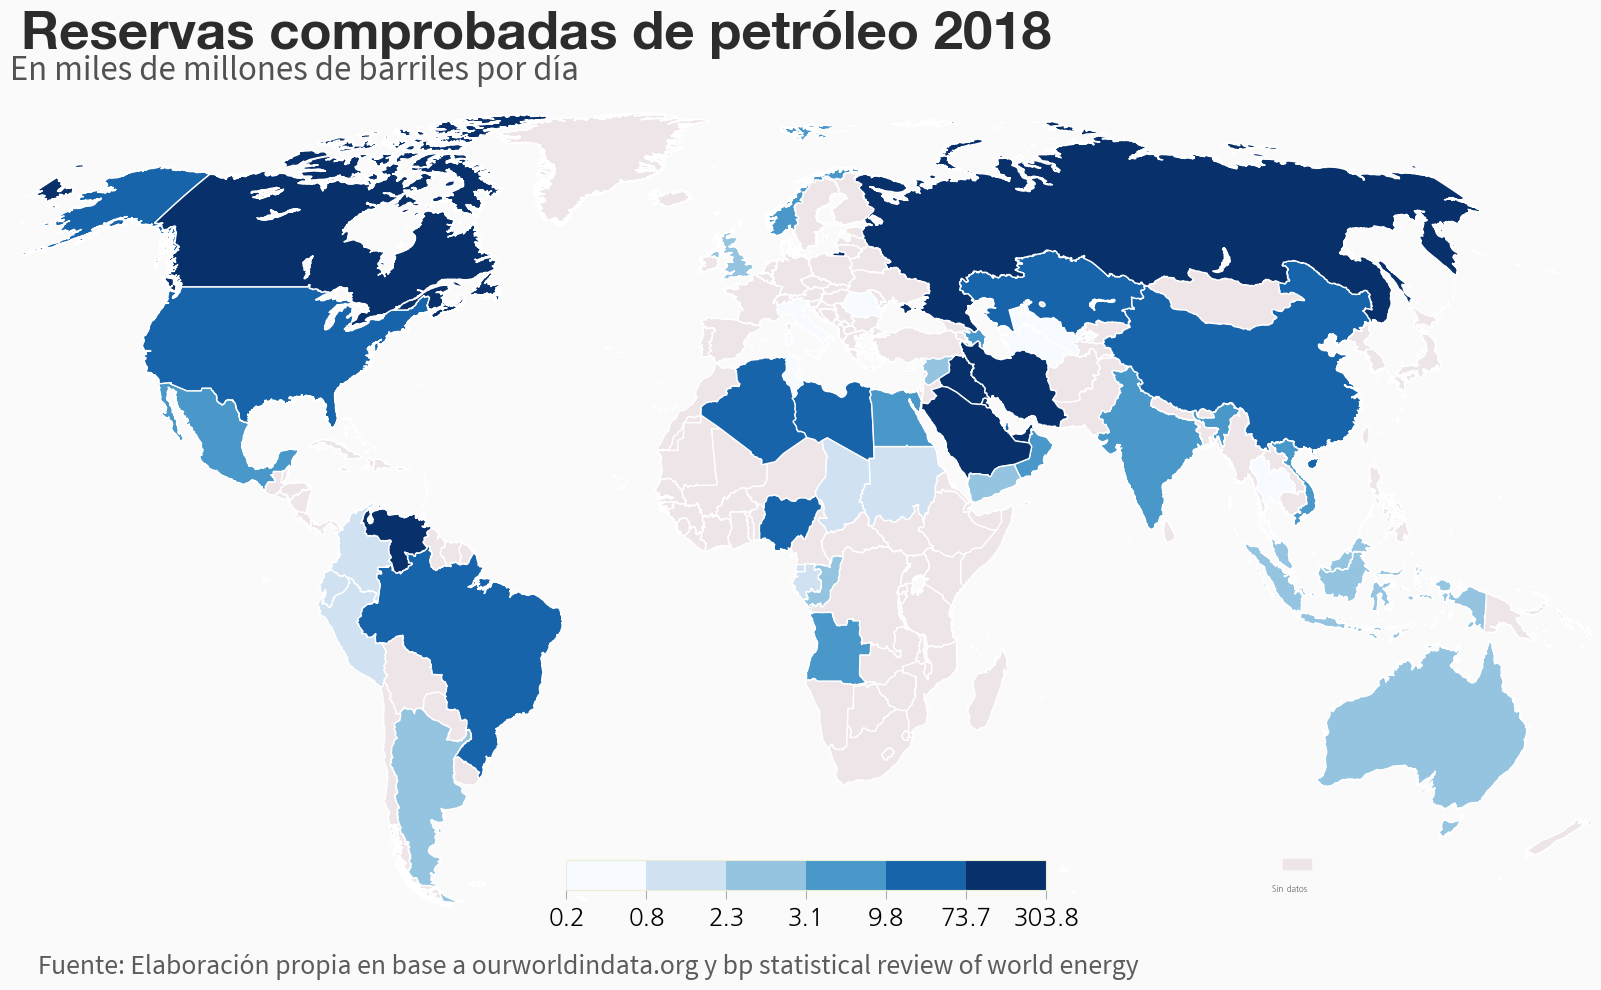

In [6]:

fig, ax = plt.subplots(figsize=(16,10))
fig.patch.set_facecolor('#FAFAFA')
map=merged.dropna().plot(column='Oil proved reserves - BBL',cmap="Blues",ax=ax, scheme ='quantiles',
                         k=6,edgecolor='w',zorder=10)
            #,classification_kwds=dict(bins=b), edgecolor='w')
ass=merged[merged.isna().any(axis=1)].plot(ax=ax, color='#EEE5E9',edgecolor='w')
ax.set_facecolor('#fafafa')

ax_legend = fig.add_axes([0.35, 0.1000000005, 0.3, 0.03], zorder=3)
bounds=[0.24, 0.82, 2.26, 3.11, 9.83, 73.71, 303.81 ]
cmap = mpl.cm.Blues
# bounds = list(mapclassify.Quantiles(merged['Oil - Proved reserves'].dropna(), k=7).bins)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

ax_legend.tick_params(axis="x",direction="out", color= '#AEAEAE', length=6.5, pad=3.5, width=.8, which='major')
ax_legend.tick_params(axis="y",direction="out", color= '#AEAEAE',length=.5, pad=3.5, width=.8)
cb2.outline.set_edgecolor('#EAEFD3')

plt.xticks(rotation=0, fontproperties=ticks, fontsize=30)
plt.yticks(fontproperties=ticks, fontsize=18)
ax.set_axis_off()
ax.set_xlim([-1.3e7, 1.52e7])
ax.set_ylim([-6.5e6, 8.8e6])
red_patch = mpatches.Patch(color='#EEE5E9', label='Sin datos')

l=ax.legend(handles=[red_patch],
            prop=ticks,
            markerscale=3,edgecolor='#fafafa',
            facecolor='#fafafa',
            bbox_to_anchor=(0.43, 0.052, 0.429, 0.057))#(.53,0.005) para fig normal
plt.setp(l.get_texts(), color='#5C5C5C')
for txt in l.get_texts():
    txt.set_ha("center") # horizontal alignment of text item
    txt.set_x(-50) # x-position
    txt.set_y(-23) # y-position
# fig.colorbar(map, ax=ax)
plt.subplots_adjust(bottom=0.1)
text1 = "Fuente: Elaboración propia en base a ourworldindata.org y bp statistical review of world energy"
plt.figtext(.02,.01, text1, fontproperties=subtitle, fontsize=20, color='#5C5C5C', va="bottom",
            ha="left")

plt.suptitle('En miles de millones de barriles por día',color='#525252',
             fontproperties=subtitle, fontsize=25, x=.18, y=.935)#fontsize=20 para fig normal

plt.subplots_adjust(top=3)
ax.set_title('Reservas comprobadas de petróleo 2018', fontproperties=title, fontsize=38,
loc='left', verticalalignment='bottom', x=0, pad=10, color='#2C2C2C')
fig.tight_layout()
fig.savefig('/content/drive/My Drive/choro1.pdf', facecolor=fig.get_facecolor())

# Refinación

In [81]:
df_prod = pd.read_excel('/content/drive/MyDrive/data/T45.xlsx', header=2, index_col=0).dropna()#https://asb.opec.org/data/ASB_Data.php


In [120]:
df_prod.index = [x.strip() for x in df_prod.index]

In [122]:
unwanted_index = ['OPEC Share in %',
'OECD Americas',
 'OECD',
 'OECD Europe',
 'OECD Asia Pacific',
 'Latin America',
 'Middle East',
'Total World',
'OPEC', 'Others', 'Other Asia', 'Africa', 'Other Europe', 'Other Eurasia']

In [123]:
df_18 = df_prod.loc[~df_prod.index.isin(unwanted_index), 2018].sort_values(ascending=False).to_frame()
df_18.index

Index(['United States', 'China', 'Russia', 'India', 'South Korea', 'Japan',
       'Saudi Arabia', 'Germany', 'Canada', 'Brazil', 'I.R.Iran', 'Italy',
       'Thailand', 'Spain', 'Netherlands', 'United Kingdom', 'Singapore',
       'France', 'Indonesia', 'United Arab Emirates', 'Kuwait', 'Venezuela',
       'Iraq', 'Belgium', 'Mexico', 'Algeria', 'Poland', 'Turkey', 'Australia',
       'Egypt', 'Argentina', 'Malaysia', 'South Africa', 'Kazakhstan',
       'Belarus', 'Qatar', 'Colombia', 'Pakistan', 'Romania', 'Philippines',
       'Chile', 'Vietnam', 'Turkmenistan', 'Ecuador', 'Bulgaria',
       'New Zealand', 'Azerbaijan', 'Libya', 'Ukraine', 'Croatia', 'Angola',
       'Nigeria', 'Congo', 'Gabon'],
      dtype='object')

In [124]:
fig = px.bar(df_18.iloc[:10].sort_values(2018), orientation='h',
             title='Top 10 Producción de productos derivados del petróleo 2018',
             )
fig.show()